## GEOG 458: Advanced Digital Geographies
#### Group 6 Members: Xinbo Lu, Wenjin Yu, Jody Tran, Doyle Park, Abraham Im
#### 2/15/2019
#### Group Lab 3


### Part 1 – Data Description and Overview

> A region that encloses a city is called an urban area. Urban areas are developed spaces that have a density of human structures. According to the United States Census Bureau, *any census block groups having a density of at least 500/sq mi (190/km2) are considered as the urban area in the United States.*  We will be using this definition to complete our calculation in the following parts.<br>

> The definition of an urban area may vary on the context. Different countries have a different classification on "Urban Areas." For example, Canada, as our neighboring countries, see *places of more than 1 000 residents, having a population density of 400 or more per square kilometer as urban areas*. Japan, famous for its large number of inhabitants crowded in Tokyo, defines *cities that have 50,000 or more inhabitants with 60% or more of houses located in the main built-up areas and more than 60% of the population employed in manufacture, trade or other types of urban industries as urban cities.* <br>

> US Census data is used in this group lab assignment. It is worth mentioning that, the data involved here has some limitations. There's no verification of the data. Survey outcomes on the population may sometimes undercount the population density, considering the hardship of estimating undocumented residents. The actual number of residents can then be calculated indirectly combining multiple data sources such as IRS tax data, DMV registration data, and Census data. Another concern of the Census data is that the determination of what geographical unit to use to approximate an “urban area” is critically important for the indexes selected for the Census Bureau analysis. It appears inappropriate for the Census Bureau to claim that census tracts defined a half-century ago “represent neighborhoods.” As the Census Bureau, itself notes, “Census tracts...when first delineated, are designed to be homogeneous concerning population characteristics, economic status, and living conditions.” Once defined, the Census Bureau does not allow adjustments of census tract boundaries (except for subdivisions), regardless of whether the neighborhood characteristics change. <br>

> In Part 3, block groups with a population density of at least **500/sq mi** are assigned a value of "urban", otherwise, they are assigned the value of "rural" in the column. We found that **80.48%** of the population of the state is urbanized, **3.47%** of the land area of the state is urbanized. If one region was considered "rural" back in 2008 but fitted as "urban" in 2018, it is categorized as "urbanized."If there is no change in its urbanization development, this place is seen as "no change in category." If this region was considered "urban" in 2008 but became "rural" in 2018, it is categorized as "deurbanized." Part 3.4 lists out the urbanization status over the previous decade. Part 3.5 shows that **65** block groups are urbanized and **0** block group is deurbanized in the most recent year.  Part 3.6 includes maps that demostrating urbanization in the area of interest.<br>

### Part 2 – Basic Processing with Python

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
%matplotlib inline

#### Part 2.1

In [3]:
## reading files
WA_bg = gpd.read_file("C:/Users/LXB19/Documents/GEOG458/GroupLab3/saep_bg10_Copy/saep_bg10.shp")
FIPS_to_CountyNames_gdf = gpd.read_file("C:/Users/LXB19/Documents/GEOG458/GroupLab3/WashingtonFIPS_copy.dbf")
WA_bg.head(5)

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2014,OHU2015,OHU2016,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,277.494,279.680,287.530,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,..."
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,524.831,521.228,517.427,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,..."
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,246.344,243.965,242.033,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,..."
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,208.923,203.761,205.502,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707697, ..."
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,285.857,286.251,278.398,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,..."


In [4]:
print "Initial table: "
print FIPS_to_CountyNames_gdf.head(5)

Initial table: 
  CountyName FIPSCounty geometry
0      Adams        001     None
1     Asotin        003     None
2     Benton        005     None
3     Chelan        007     None
4    Clallam        009     None


In [5]:
FIPS_to_CountyNames_gdf.rename(columns={'FIPSCounty':'COUNTYFP10'},inplace=True)
FIPS_to_CountyNames_gdf.drop('geometry', axis=1, inplace=True)
print
print "After preparation for merge (join): "
print FIPS_to_CountyNames_gdf.head()


After preparation for merge (join): 
  CountyName COUNTYFP10
0      Adams        001
1     Asotin        003
2     Benton        005
3     Chelan        007
4    Clallam        009


In [6]:
JOINING_KEY = 'COUNTYFP10'
WA_bg_with_CountyName = WA_bg.merge(FIPS_to_CountyNames_gdf, on=JOINING_KEY)
WA_bg_with_CountyName.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,OHU2015,OHU2016,OHU2017,OHU2018,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,CountyName
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,279.680,287.530,287.522,287.758,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",Adams
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,521.228,517.427,516.077,524.645,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",Adams
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,243.965,242.033,241.365,245.491,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",Adams
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,203.761,205.502,204.547,202.854,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707697, ...",Adams
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,286.251,278.398,278.400,267.983,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,...",Adams


In [ ]:
## create a shapefile whose filename is the county name 
## and whose contents are the polygons for the block groups within that county

WA_bg_with_CountyName_wgs84 = WA_bg_with_CountyName.to_crs(epsg=4326)
import os  
for county in FIPS_to_CountyNames_gdf['CountyName']:
    filename_to_output = county+".geojson"
    print "Outputting "+filename_to_output
    try: 
        os.remove(filename_to_output)
    except OSError:
        pass
    (WA_bg_with_CountyName_wgs84[WA_bg_with_CountyName['CountyName'] == county]
     .to_file(filename_to_output,driver="GeoJSON"))

#### Part 2.2

In [31]:
## Print out a ranked list, in descending order, of the ten largest total populations 
## in 2017 of counties in Washington, according to this dataset.

pop2018_ser7es = WA_bg_with_CountyName.groupby(['CountyName']).sum()['POP2018'].rank(ascending=False).head(10)
top10_POP2017_county = pop2018_series.index.tolist()

## remove the 'u' for each item in the list
top10_POP2017_county = map(lambda name: str(name), top10_POP2017_county)

## print the list
print " the ten largest total population counties in 2017 of counties in Washington, according to this dataset, are", top10_POP2017_county

 the ten largest total population counties in 2017 of counties in Washington, according to this dataset, are ['Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Columbia', 'Cowlitz', 'Douglas', 'Ferry']


### Part 3 – Urban vs. Rural

In [33]:
## Read the Washington State shp
WA_shp = gpd.read_file("C:/Users/LXB19/Documents/GEOG458/GroupLab3/saep_bg10_Copy/saep_bg10.shp")

## Calculate Population density in 2018
WA_shp['Pop_Per_sqML_2018'] = WA_shp.POP2018/WA_shp.ALANDMI + 10**-8


#### Part 3.1

In [53]:
## Use population density equal or greater than 500 as the urban area. Otherwise, rural.
## Adds a column for value of 'urban' or 'rural' to table.

WA_shp['Urban_2018'] = np.nan
WA_shp.loc[WA_shp.Pop_Per_sqML_2018 >= 500, 'Urban_2018'] = 'urban'
WA_shp.loc[WA_shp.Pop_Per_sqML_2018 < 500, 'Urban_2018'] = 'rural'
WA_shp.head(3)

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,Pop_Per_sqML_2018,Urban_2018,Pop_Per_sqML_2008,Urban_2008,Urban_2008_DecadeChange
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",1.270921,rural,1.192891,rural,no change in category
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",303.724695,rural,308.274775,rural,no change in category
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",171.655748,rural,173.292027,rural,no change in category


#### Part 3.2

In [35]:
## Calculates and prints out to the screen what percentage of the population of the state 
##    is urbanized in the most recent year.

UrbanArea_2018 = WA_shp[(WA_shp['Pop_Per_sqML_2018'] >= 500)]
UrbanPopPercent_2018 = round(sum(UrbanArea_2018.POP2018 / sum(WA_shp.POP2018)) * 100, 2)
print "The percentage of the population of the state is urbanized in 2018 is", UrbanPopPercent_2018, "%"

The percentage of the population of the state is urbanized in 2018 is 80.48 %


#### Part 3.3

In [36]:
##Write code that calculates and prints out to the screen what percentage 
##     of the land area of the state is urbanized in the most recent year.

## Calculating Urban area size
urbanArea_size = UrbanArea_2018.ALANDMI.sum()

## calculating the total area size
totalArea = WA_shp.ALANDMI.sum()

## getting the percentage
UrbanAreaPercent_2018 = round(urbanArea_size/totalArea * 100,2)

## Print out the statement
print "The percentage of the urbanized area size of the state in 2018 is", UrbanAreaPercent_2018, "%"

The percentage of the urbanized area size of the state in 2018 is 3.47 %


#### Part 3.4

In [37]:
## Add a column to the shapefile's data table for whether block groups have 'urbanized', 
## 'no change in category', or 'deurbanized' over the previous decade (i.e. if most recent year is ’18, 
## then ’08-’18), using the above classification for urban/rural you decided on. 
## Represent it as a categorical change (a string of text), not in terms of some numerical change. 
## Fill in the field for all rows! 

## Population density 2008
WA_shp['Pop_Per_sqML_2008'] = WA_shp.POP2008/WA_shp.ALANDMI + 10**-8

## Creating new column for comparison
## Urban_2008 shows whether the block is urban or rural
WA_shp['Urban_2008'] = np.nan

## Create the column to show the decade change (comparing 2008 vs 2018)
WA_shp['Urban_2008_DecadeChange']= np.nan

In [38]:
## Set the urban/rural definition to each block
WA_shp.loc[WA_shp.Pop_Per_sqML_2008 >= 500, 'Urban_2008'] = 'urban'
WA_shp.loc[WA_shp.Pop_Per_sqML_2008 < 500, 'Urban_2008'] = 'rural'

In [41]:
for i in range(len(WA_shp)):
    ## case 1: if 2018 is urban, and 2008 is rural, then urbanized"
    if (WA_shp.Urban_2018.loc[i] == 'urban' and WA_shp.Urban_2008[i] =='rural'):
        WA_shp.Urban_2008_DecadeChange.loc[i] = 'urbanized'
    ## case 2: if 2018 is rural, and 2008 is urban, then deurbanized"
    elif(WA_shp.Urban_2018.loc[i] == 'rural' and WA_shp.Urban_2008[i] == 'urban'):
        WA_shp.Urban_2008_DecadeChange.loc[i] = 'deurbanized'
    ## case 3, 2008 and 2018 are both rural/urbanized, then no change in category"
    else:
        WA_shp.Urban_2008_DecadeChange.loc[i] = 'no change in category'

In [42]:
WA_shp.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,INTPTLON10,INTPTLAT10,...,COHU00_10,PCOHU00_10,COHU10_18,PCOHU10_18,geometry,Pop_Per_sqML_2018,Urban_2018,Pop_Per_sqML_2008,Urban_2008,Urban_2008_DecadeChange
0,53,001,950100,1,530019501001,Block Group 1,G5030,S,-118.398815,47.150809,...,33.751,0.143,17.758,0.066,"POLYGON ((2077217.074095237 640954.0110817049,...",1.270921,rural,1.192891,rural,no change in category
1,53,001,950100,2,530019501002,Block Group 2,G5030,S,-118.351143,47.135101,...,3.398,0.007,-0.355,0.000,"POLYGON ((2165913.051240579 657352.8005365322,...",303.724695,rural,308.274775,rural,no change in category
2,53,001,950100,3,530019501003,Block Group 3,G5030,S,-118.382148,47.138222,...,-26.312,-0.097,-0.509,-0.002,"POLYGON ((2166254.454566129 657810.7137267586,...",171.655748,rural,173.292027,rural,no change in category
3,53,001,950200,1,530019502001,Block Group 1,G5030,S,-118.219484,46.874027,...,-21.255,-0.093,-5.146,-0.025,"POLYGON ((2150159.78406948 554295.8999707697, ...",1.006330,rural,1.087854,rural,no change in category
4,53,001,950200,2,530019502002,Block Group 2,G5030,S,-118.522323,46.968569,...,-1.330,-0.005,-22.017,-0.076,"POLYGON ((2082999.834788324 575018.8611698836,...",5.199997,rural,5.331252,rural,no change in category


#### Part 3.5

In [43]:
## calculates and prints out how many block groups urbanized and how many deurbanized over the previous decade.

## calculate how many block groups are urbanized by using the "urbanized" attribute
UrbanizedLastDecade = len(WA_shp[WA_shp.Urban_2008_DecadeChange =='urbanized'].index)

## calculate how many block group are deurbanized by using the "deurbanized" attribute
DeurbanizedLastDecade = len(WA_shp[WA_shp.Urban_2008_DecadeChange =='deurbanized'].index)

## print out the statement
print UrbanizedLastDecade,"blocks are urbanized over the previous decade, and",\
        DeurbanizedLastDecade, "blocks are deurbanized over the previous decade"

65 blocks are urbanized over the previous decade, and 0 blocks are deurbanized over the previous decade


#### Part 3.6

NameError: name 'ax' is not defined

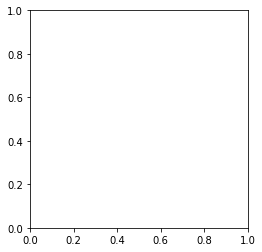

In [52]:
%matplotlib inline
## Add part 3.6 here

#map for rural 2008
rural08 = UrbanArea_2018[ UrbanArea_2018['Urban_2018'] == "rural" ].plot(
    column="Pop_Per_sqML_2008",
    linewidth=0.0,
    scheme='quantiles',k=5)
# remove the axis
rural08.axis("off")
# add a title
rural08.set_title("Rural Area in 2008", fontdict={"fontsize": "25", "fontweight" : "3"})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


#map for rural 2018
UrbanArea_2018[ UrbanArea_2018['Urban_2018'] == "rural" ].plot(
    column="Pop_Per_sqML_2018",
    linewidth=0.0,
    scheme='quantiles',k=5)
# remove the axis
rural18.axis("off")
rural18.set_title("Rural Area in 2018", fontdict={"fontsize": "25", "fontweight" : "3"})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


#map for urban 2008
UrbanArea_2018[ UrbanArea_2018['Urban_2018'] == "urban" ].plot(
    column="Pop_Per_sqML_2008",
    linewidth=0.0,
    scheme='quantiles',k=5)
# remove the axis
urban08.axis("off")
urban08.set_title("Urban Area in 2008", fontdict={"fontsize": "25", "fontweight" : "3"})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


#map for urban 2018
UrbanArea_2018[ UrbanArea_2018['Urban_2018'] == "urban" ].plot(
    column="Pop_Per_sqML_2018",
    linewidth=0.0,
    scheme='quantiles',k=5)
# remove the axis
urban18.axis("off")
urban18.set_title("Urban Area in 2018", fontdict={"fontsize": "25", "fontweight" : "3"})
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

